# Diabetes Prediction System

**Importing Modules**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading dataset into **Pandas dataframe**

In [5]:
#Loading data into pandas dataframe
Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

#making a copy of main dataset
X = Data.copy()
X.shape

(768, 7)

In [6]:
X.head(10)

,glucose,bp,insulin,bmi,pedigree,age,outcome
0,148,72.0,0,33.6,0.627,50,Yes
1,85,66.0,0,26.6,0.351,31,No
2,183,64.0,0,23.3,0.672,32,Yes
3,89,66.0,94,28.1,0.167,21,No
4,137,40.0,168,43.1,2.288,33,Yes
5,116,74.0,0,25.6,0.201,30,No
6,78,50.0,88,31.0,0.248,26,Yes
7,115,0.0,0,35.3,0.134,29,No
8,197,70.0,543,30.5,0.158,53,Yes
9,125,96.0,0,0.0,0.232,54,Yes


From the data description, we can see that there are null values in columns bp and bmi. Also there are non-numeric columns.
So we need to pre-process the data before using it to train any model.

**Pre-Processing Data**

Changing non-numeric values to numeric values

In [7]:
X.outcome.replace(['No','Yes'],[0,1], inplace=True) #replacing 'No' with 0 and 'Yes' with 1 in 'Outcome'
X.head(10)

,glucose,bp,insulin,bmi,pedigree,age,outcome
0,148,72.0,0,33.6,0.627,50,1
1,85,66.0,0,26.6,0.351,31,0
2,183,64.0,0,23.3,0.672,32,1
3,89,66.0,94,28.1,0.167,21,0
4,137,40.0,168,43.1,2.288,33,1
5,116,74.0,0,25.6,0.201,30,0
6,78,50.0,88,31.0,0.248,26,1
7,115,0.0,0,35.3,0.134,29,0
8,197,70.0,543,30.5,0.158,53,1
9,125,96.0,0,0.0,0.232,54,1


Searching for Null Values

In [8]:
print("Null values count:\n",X.isnull().sum()) #sum of Null values in a column

Null values count:
 glucose     0
bp          2
insulin     0
bmi         2
pedigree    0
age         0
outcome     0
dtype: int64


We can see that dataset had null values. Let us visualise the null values using heatmap.

**Visualising Null values using heatmap**

<Axes: >

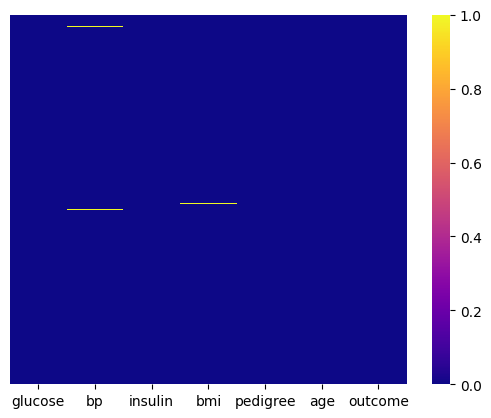

In [9]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=True,cmap='plasma')

**Handling null values**





,glucose,bp,insulin,bmi,pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.079634,79.799479,32.009138,0.471876,33.240885,0.348958
std,31.972618,19.334027,115.244002,7.876858,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,30.500000,32.004569,0.372500,29.000000,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


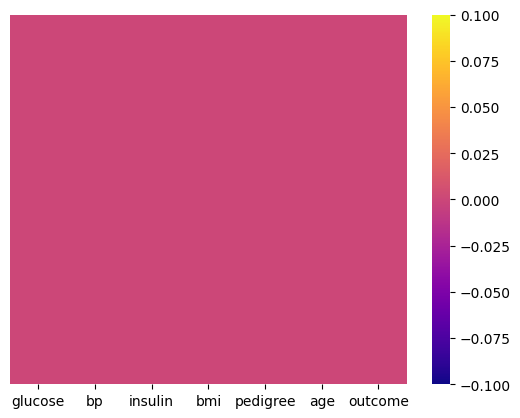

In [10]:
X['bmi'].fillna(X['bmi'].mean(), inplace = True)
X['bp'].fillna(X['bp'].mean(), inplace = True)

sns.heatmap(X.isnull(),yticklabels=False,cbar=True,cmap='plasma')
X.describe()

Now we have successfully handled Null values and converted non-numeric values to Numeric valus. 
So we're moving on to find if there are any outliers in our data and find the correlations of different attributes to our target i.e. 'Outcome' column in the dataset

**Checking Correlation** of every attribute with our target attribute i.e 'Outcome'
  

In [11]:
correlation = X.corr()
print("Correlation of each attribute with Outcome: \n\n",correlation['outcome'])

Correlation of each attribute with Outcome: 

 glucose     0.466581
bp          0.063315
insulin     0.130548
bmi         0.292956
pedigree    0.173844
age         0.238356
outcome     1.000000
Name: outcome, dtype: float64


**Checking for outliers**

<Axes: ylabel='glucose'>

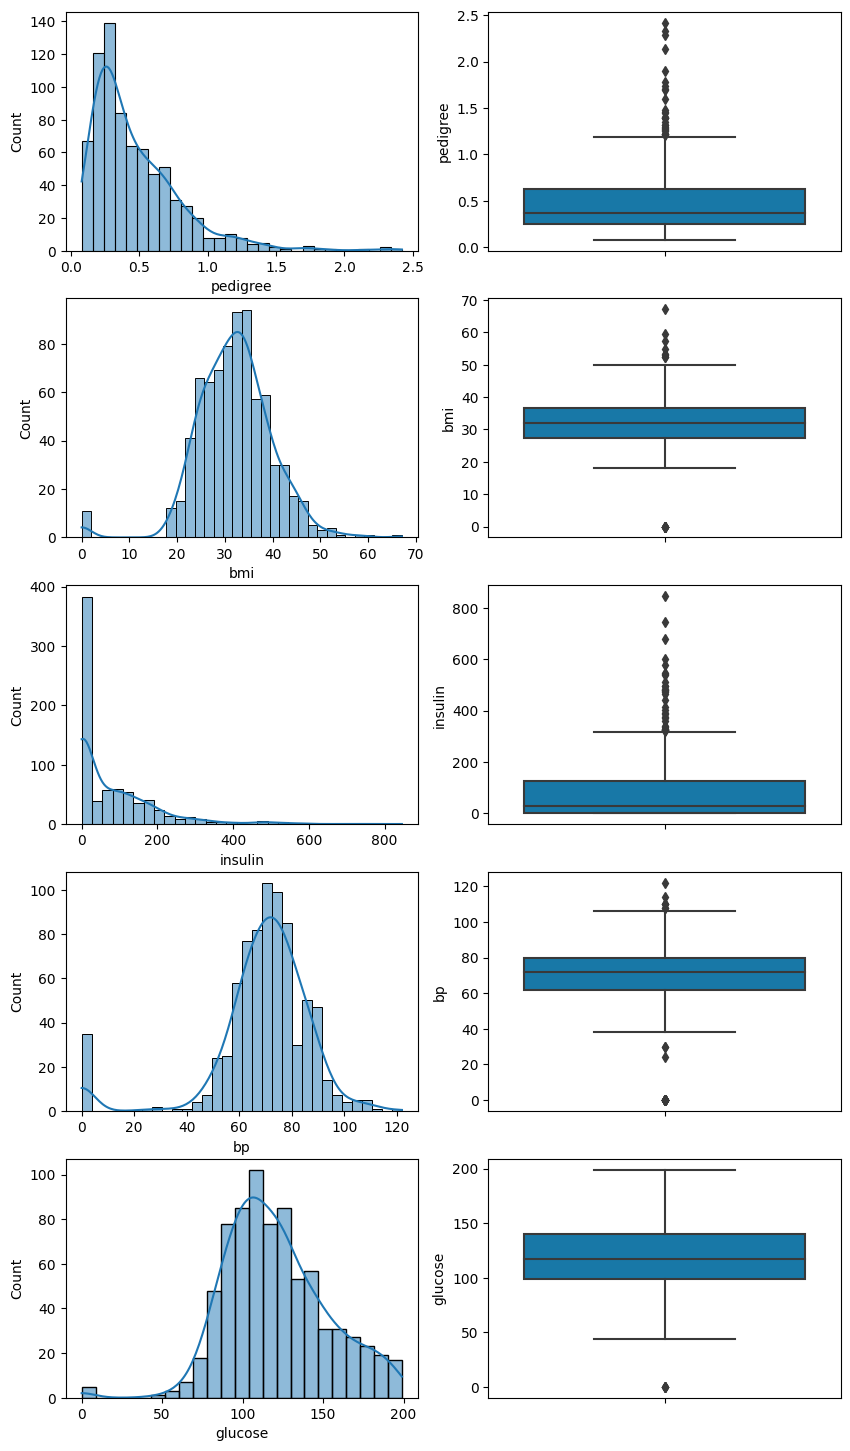

In [12]:
#plotting distribution plot and boxplot for

f,axes = plt.subplots(5,2,figsize=(10,18))

sns.histplot(ax=axes[0][0],data=X,x='pedigree',kde=True)
sns.boxplot(ax=axes[0][1],data=X,y="pedigree",palette="winter")

sns.histplot(ax=axes[1][0],data=X,x='bmi',kde=True)
sns.boxplot(ax=axes[1][1],data=X,y="bmi",palette="winter")

sns.histplot(ax=axes[2][0],data=X,x='insulin',kde=True)
sns.boxplot(ax=axes[2][1],data=X,y="insulin",palette="winter")

sns.histplot(ax=axes[3][0],data=X,x='bp',kde=True)
sns.boxplot(ax=axes[3][1],data=X,y="bp",palette="winter")

sns.histplot(ax=axes[4][0],data=X,x='glucose',kde=True)
sns.boxplot(ax=axes[4][1],data=X,y="glucose",palette="winter")

From the distribution plots and boxplots we can see that there are possible outliers in the columns 'glucose', 'bp', 'insulin', 'bmi' and 'pedigree'.

We have not checked for outliers in the column outcome as it contains values in binaries and 

**Handling the outliers**

We used Z-score method to handle the outliers

In [13]:
from scipy import stats

X_having_outliers = X.copy() #making copy of dataset having outliers

#To calculating Z-score we've to subtract any random data-point with it's mean then have to divide with standard deviation

#getting the z-score of glucose attribute as an numpy array
glu_z = np.abs(stats.zscore(X.glucose)) 
a1 = np.array(np.where(glu_z > 2.5)).flatten() #checking indexes having z-score greater than 2.5 and making an array of it

#getting the z-score of bp attribute as an numpy array
bp_z = np.abs(stats.zscore(X.bp)) 
a2 = np.array(np.where(bp_z > 2.5)).flatten() #checking indexes having z-score greater than 2.5 and making an array of it

#getting the z-score of insulin attribute as an numpy array
ins_z = np.abs(stats.zscore(X.insulin)) 
a3 = np.array(np.where(ins_z > 2.5)).flatten() #checking indexes having z-score greater than 2.5 and making an array of it

#getting the z-score of bmi attribute as an numpy array
bmi_z = np.abs(stats.zscore(X.bmi)) 
a4 = np.array(np.where(bmi_z > 2.5)).flatten() #checking indexes having z-score greater than 2.5 and making an array of it

#getting the z-score of pedigree attribute as an numpy array
pedigree_z = np.abs(stats.zscore(X.pedigree)) 
a5 = np.array(np.where(pedigree_z > 2.5)).flatten() #checking indexes having z-score greater than 2.5 and making an array of it

#merging all 1d array into one
b1 = np.concatenate((a1,a2,a3,a4,a5)) 

#dropping indexes that has the z-score greater than 2.5
X.drop(b1,axis=0,inplace=True)

**Comparison of dataset before and after removing the outliers**

Text(0.5, 1.0, 'After')

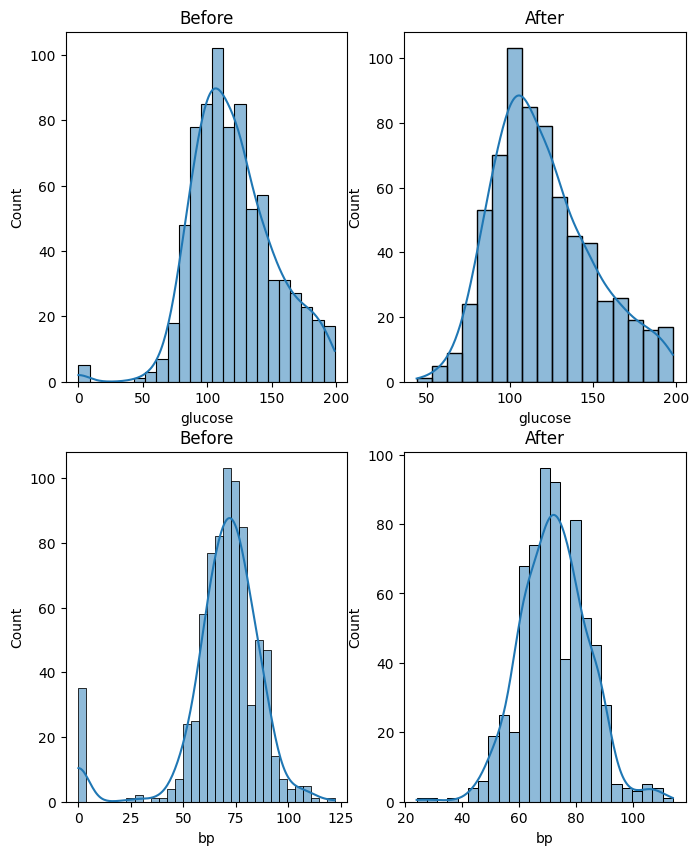

In [14]:
#comparing distributions of with outliers and without outliers
f,axes = plt.subplots(2,2,figsize=(8,10))
sns.histplot(ax=axes[0][0],data=X_having_outliers,x="glucose",kde=True).set_title("Before")
sns.histplot(ax=axes[0][1],data=X,x="glucose",kde=True).set_title("After")

sns.histplot(ax=axes[1][0],data=X_having_outliers,x="bp",kde=True).set_title("Before")
sns.histplot(ax=axes[1][1],data=X,x="bp",kde=True).set_title("After")

Text(0.5, 1.0, 'After')

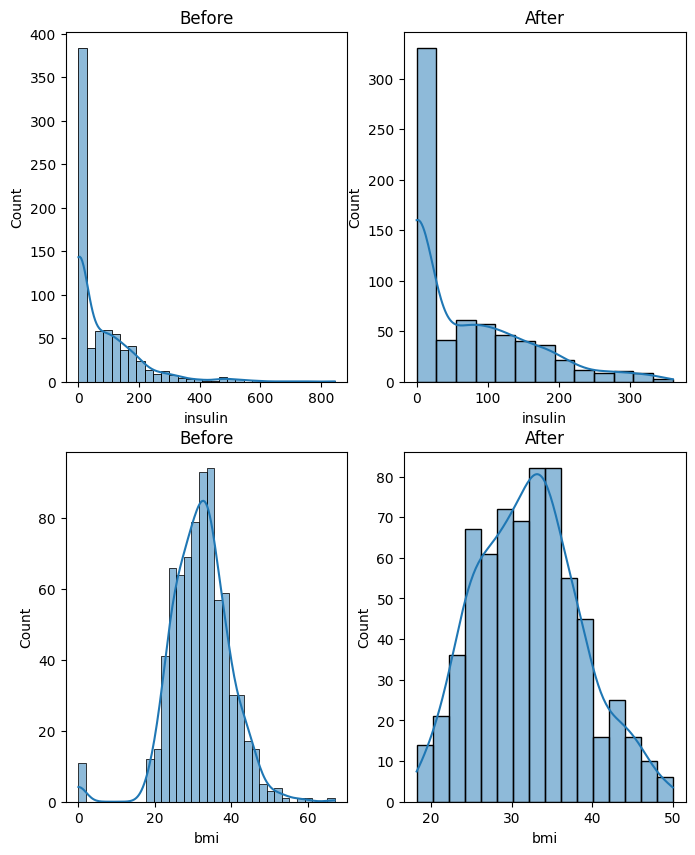

In [15]:
f,axes = plt.subplots(2,2,figsize=(8,10))
sns.histplot(ax=axes[0][0],data=X_having_outliers,x="insulin",kde=True).set_title("Before")
sns.histplot(ax=axes[0][1],data=X,x="insulin",kde=True).set_title("After")

sns.histplot(ax=axes[1][0],data=X_having_outliers,x="bmi",kde=True).set_title("Before")
sns.histplot(ax=axes[1][1],data=X,x="bmi",kde=True).set_title("After")

Text(0.5, 1.0, 'After')

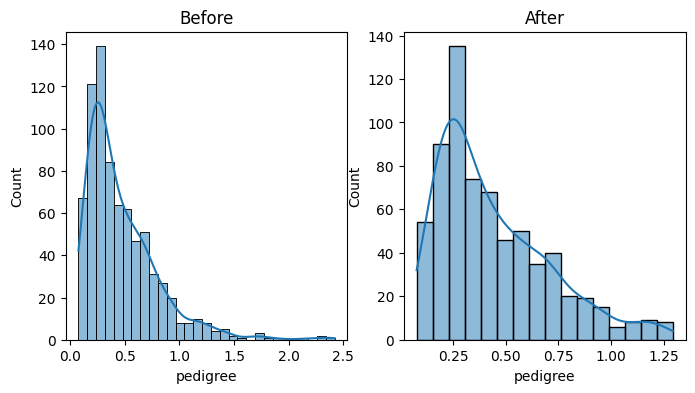

In [16]:
f,axes = plt.subplots(1,2,figsize=(8,4))
sns.histplot(ax=axes[0],data=X_having_outliers,x="pedigree",kde=True).set_title("Before")
sns.histplot(ax=axes[1],data=X,x="pedigree",kde=True).set_title("After")

Text(0.5, 1.0, 'After')

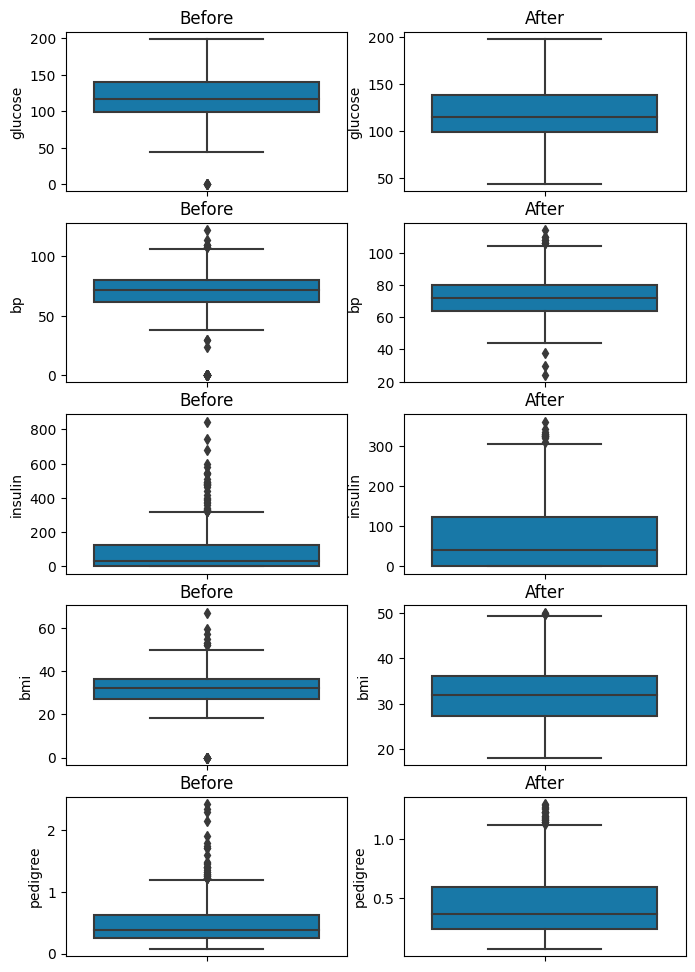

In [17]:
#comparing boxplots plots after handling the outliers
f,axes = plt.subplots(5,2,figsize=(8,12))
sns.boxplot(ax=axes[0][0],data=X_having_outliers,y="glucose",palette="winter").set_title("Before")
sns.boxplot(ax=axes[0][1],data=X,y="glucose",palette="winter").set_title("After")

sns.boxplot(ax=axes[1][0],data=X_having_outliers,y="bp",palette="winter").set_title("Before")
sns.boxplot(ax=axes[1][1],data=X,y="bp",palette="winter").set_title("After")

sns.boxplot(ax=axes[2][0],data=X_having_outliers,y="insulin",palette="winter").set_title("Before")
sns.boxplot(ax=axes[2][1],data=X,y="insulin",palette="winter").set_title("After")

sns.boxplot(ax=axes[3][0],data=X_having_outliers,y="bmi",palette="winter").set_title("Before")
sns.boxplot(ax=axes[3][1],data=X,y="bmi",palette="winter").set_title("After")

sns.boxplot(ax=axes[4][0],data=X_having_outliers,y="pedigree",palette="winter").set_title("Before")
sns.boxplot(ax=axes[4][1],data=X,y="pedigree",palette="winter").set_title("After")

From the distribution plots and boxplots shown above, we can see that a lot of outliers have been handled. Now we will use this data to train a Random Forest Classifier model. We will be training a Random Forest Classifier model to determine the principal attributes in the dataset.

# Random Forest Classifier

Training random forest classifier to determine the principle attributes

In [18]:
#importing modules for random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#splitting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(X.drop('outcome',axis=1),X['outcome'],test_size=0.30,random_state=100) #without outliers and standardize

print("No. of observations for the training dataset: ",len(x_train))
print("No. of observations for the testing dataset: ",len(x_test))

No. of observations for the training dataset:  473
No. of observations for the testing dataset:  204


In [19]:
#making random forest classifier object
rf= RandomForestClassifier(n_jobs=-1,n_estimators=100,random_state=0)

rf.fit(x_train,y_train) #trining the model
pred=rf.predict(x_test) #predicting the target attributes for test dataset

acc_rf = rf.score(x_test,y_test)
print("Accuracy of rf is: ",acc_rf,"\n")

Accuracy of rf is:  0.7843137254901961 



In [20]:
#creating a confusion matrix to see actual and predicted results
confusion_df = pd.DataFrame(confusion_matrix(y_test, pred),
               columns = ["Predicted Outcome " + str(class_name) for class_name in [0, 1]],
               index = ["Actual Outcome " + str(class_name) for class_name in [0, 1]])
confusion_df

,Predicted Outcome 0,Predicted Outcome 1
Actual Outcome 0,123,10
Actual Outcome 1,34,37


In [21]:
col = X.columns #collecting the column names
#view a list of the features & their importance scores
fi = rf.feature_importances_
for i in range(0, len(fi)):
  print(col[i],"=",fi[i])

glucose = 0.28611949728592045
bp = 0.10406010982541437
insulin = 0.09215271103438498
bmi = 0.18573718776000556
pedigree = 0.1555065645601749
age = 0.17642392953409966


As we can see from the calculated feature importance values, bp and insulin contains lower values than the other 4 attributes so we'll eliminate those two and remaining 4 will be our principal attributes

In [22]:
final = X.drop(["bp","insulin"], axis=1) #dropping bp and insulin columns in the new dataset
final.describe() #describing the final dataset

,glucose,bmi,pedigree,age,outcome
count,677.000000,677.000000,677.000000,677.000000,677.000000
mean,120.070901,32.128965,0.441594,33.353028,0.327917
std,29.887179,6.457651,0.265363,11.771658,0.469802
min,44.000000,18.200000,0.078000,21.000000,0.000000
25%,99.000000,27.400000,0.244000,24.000000,0.000000
50%,115.000000,32.009138,0.365000,29.000000,0.000000
75%,139.000000,36.200000,0.593000,41.000000,1.000000
max,198.000000,50.000000,1.292000,81.000000,1.000000


Saving the modifier dataset containing only principal attributes

In [23]:
final.to_csv("/content/final.csv")

Splitting the final dataset

In [24]:
final_x_train, final_x_test, final_y_train, final_y_test = train_test_split(final.drop('outcome',axis=1),final['outcome'],test_size=0.30,random_state=100)

print("Size of final training dataset: ",len(final_x_train))
print("Size of final testing dataset: ",len(final_x_test))

Size of final training dataset:  473
Size of final testing dataset:  204


Standardizing the final dataset

In [25]:
#standardizing features
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
final_x_std_train = std.fit_transform(final_x_train)
final_x_std_test=std.fit_transform(final_x_test)

Splitting dataset which having outliers

In [26]:
#data with outliers without standardize
X_having_outliers = X_having_outliers.drop(["bp","insulin"], axis=1)
o_x_train, o_x_test, o_y_train, o_y_test = train_test_split(X_having_outliers.drop('outcome',axis=1),X_having_outliers['outcome'],test_size=0.30,random_state=100)

In [27]:
#data with outliers with standardize
o_x_std_train = std.fit_transform(o_x_train)
o_x_std_test = std.fit_transform(o_x_test)

# Training our required models

Our project goal requires us to train 4 specific classifier models

1. KNN Classifier
2. Naive Bayes Classifier
3. Decision Tree Classifier
4. Logistic Regression

We will be using the dataset obtained after pre-processing the given train dataset to train our required models.

**KNN Classifier**

In [28]:
#imporing modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [29]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)
knn.fit(final_x_std_train, final_y_train)

pipe = Pipeline([('standardizer', std), ('knn', knn)])

search_space = [{'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,11,13]}] #create space of candidate values

clf = GridSearchCV(pipe, search_space, cv=5, verbose=1).fit(final_x_std_train, final_y_train) #grid search

print("k = ",clf.best_estimator_.get_params()["knn__n_neighbors"])

Fitting 5 folds for each of 11 candidates, totalling 55 fits
k =  7


We standardize the data. The reason is that the value of k remains 7.

In [30]:
#Training knn with K as 7 
knn2 = KNeighborsClassifier(n_neighbors=7, metric='euclidean', n_jobs=-1)
knn2.fit(final_x_std_train, final_y_train)
#model has been trained
pred_knn2=knn2.predict(final_x_std_test)

In [31]:
#create confusino matrix
confusion_df = pd.DataFrame(confusion_matrix(final_y_test, pred_knn2),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Actual Class " + str(class_name) for class_name in [0, 1]]) 
confusion_df

,Predicted Class 0,Predicted Class 1
Actual Class 0,121,12
Actual Class 1,38,33


Text(0.5, 0, 'False Positive Rate (FPR=FP/N=FP/(FP+TN))')

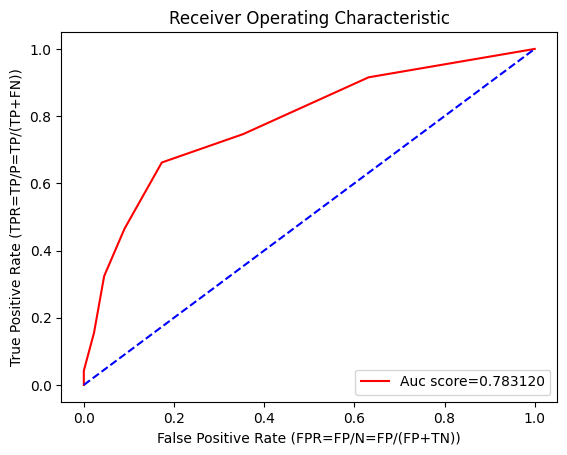

In [32]:
#ROC graph for K-NN
y_score=knn2.predict_proba(final_x_std_test)[:,1]

fpr,tpr,threshold=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')

From the Reciever Operating Characteristic (ROC) graph, we find the Area Under Curve(AUC) for our k-NN classifier model is 0.783120

AUC value of k-NN = 0.783120

In [33]:
acc_knn = knn2.score(final_x_std_test,final_y_test)
print("Accuracy of knn #knn without outliers and with standardize: ",acc_knn,"\n")

Accuracy of knn #knn without outliers and with standardize:  0.7549019607843137 



In [34]:
#knn with outliers and without standardize
knn3 = KNeighborsClassifier(n_neighbors=7, metric='euclidean', n_jobs=-1).fit(o_x_train, o_y_train)

acc_knn3 = knn3.score(o_x_test,o_y_test)
print("Accuracy of knn with outliers and without standardize: ",acc_knn3,"\n")

Accuracy of knn with outliers and without standardize:  0.7142857142857143 



In [35]:
#knn with outliers and with standardize
knn4 = KNeighborsClassifier(n_neighbors=7, metric='euclidean', n_jobs=-1).fit(o_x_std_train, o_y_train)
acc_knn4 = knn4.score(o_x_std_test,o_y_test)
print("Accuracy of knn with outliers and with standardize: ",acc_knn4,"\n")

Accuracy of knn with outliers and with standardize:  0.7186147186147186 



In [36]:
#knn without outliers and without standardize
knn5 = KNeighborsClassifier(n_neighbors=7, metric='euclidean', n_jobs=-1).fit(final_x_train, final_y_train)

acc_knn5 = knn5.score(final_x_test,final_y_test)
print("Accuracy of knn without outliers and without standardize: ",acc_knn5,"\n")

Accuracy of knn without outliers and without standardize:  0.75 



**Naive Bayes**

We will now train a Gaussian Naive Bayes classifier model using our dataset

In [37]:
#importing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [38]:
nb=GaussianNB()
nb.fit(final_x_train,final_y_train)

#naive bayes without outliers
pred_nb=nb.predict(final_x_test)

acc_nb = nb.score(final_x_test,final_y_test)
print("Accuracy of nb is: ",acc_nb)

Accuracy of nb is:  0.7941176470588235


In [39]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, pred_nb),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]])
confusion_df

,Predicted Class 0,Predicted Class 1
Class 0,125,8
Class 1,34,37


Text(0.5, 0, 'False Positive Rate (FPR=FP/N=FP/(FP+TN))')

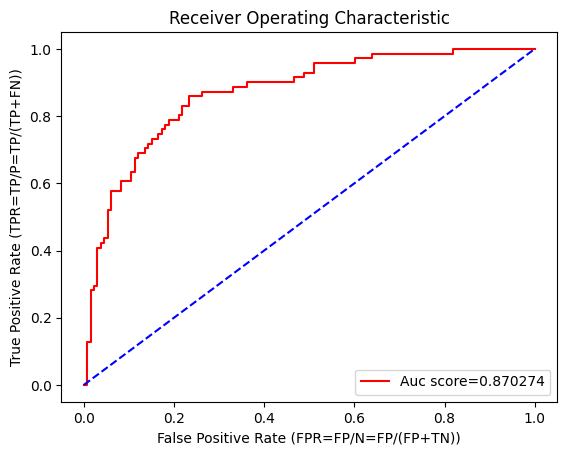

In [40]:
#ROC graph for Naive Bayes
y_score=nb.predict_proba(final_x_test)[:,1] #this line returns probability for each row of the dataset, [:,1] for 1 probability
fpr1,tpr1,threshold1=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr1,tpr1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1,tpr1,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')

From the Reciever Operating Characteristic (ROC) graph, we find the Area Under Curve (AUC) for our Gaussian Naive Bayes classifier model is 0.870274

AUC vaues of Naive Bayes = 0.870274

In [41]:
#naive bayes with outliers
nb1=GaussianNB()
nb1.fit(final_x_train,final_y_train)
nb1.fit(o_x_train,o_y_train)

acc_nb1 = nb1.score(o_x_test,o_y_test)
print("Accuracy of naive bayes with outliers: ",acc_nb1,"\n")

Accuracy of naive bayes with outliers:  0.7445887445887446 



**Decision Tree**

In [42]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree=DecisionTreeClassifier(min_samples_leaf=5,max_depth=5,random_state=100)

#decision tree without outliers
dtree.fit(final_x_train,final_y_train)
pred_dt=dtree.predict(final_x_test)
acc_dt = dtree.score(final_x_test,final_y_test)
print("Accuracy of decision tree without outliers without standardize: ",acc_dt,"\n")

Accuracy of decision tree without outliers without standardize:  0.7549019607843137 



In [44]:
#to draw the Decision Tree
from sklearn import tree
with open("FinalDTree.txt","w") as a:
  a = tree.export_graphviz(dtree, out_file = a)

[Text(0.425, 0.9166666666666666, 'x[0] <= 143.5\ngini = 0.435\nsamples = 473\nvalue = [322, 151]'),
 Text(0.15714285714285714, 0.75, 'x[1] <= 26.3\ngini = 0.327\nsamples = 364\nvalue = [289, 75]'),
 Text(0.05714285714285714, 0.5833333333333334, 'x[0] <= 138.0\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.02857142857142857, 0.4166666666666667, 'gini = 0.0\nsamples = 86\nvalue = [86, 0]'),
 Text(0.08571428571428572, 0.4166666666666667, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2571428571428571, 0.5833333333333334, 'x[3] <= 28.5\ngini = 0.395\nsamples = 273\nvalue = [199, 74]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[2] <= 0.509\ngini = 0.254\nsamples = 134\nvalue = [114, 20]'),
 Text(0.08571428571428572, 0.25, 'x[0] <= 119.5\ngini = 0.148\nsamples = 87\nvalue = [80, 7]'),
 Text(0.05714285714285714, 0.08333333333333333, 'gini = 0.055\nsamples = 71\nvalue = [69, 2]'),
 Text(0.11428571428571428, 0.08333333333333333, 'gini = 0.43\nsamples = 16\nvalue = [11, 5]

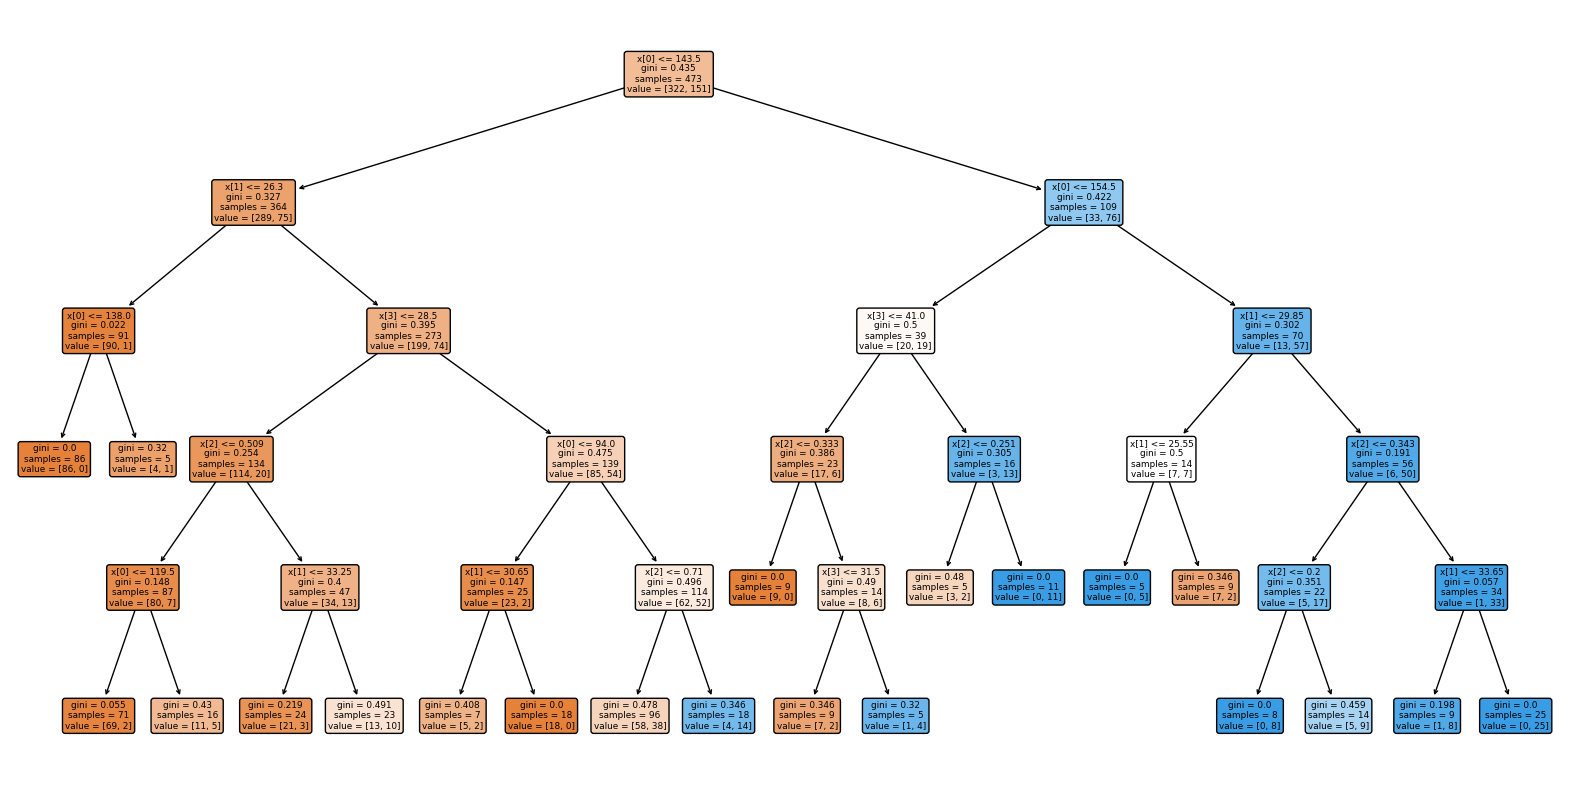

In [45]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.subplots(figsize = (20, 10))     # for resizing the graph
tree.plot_tree(dtree, filled = True, rounded = True)

In [46]:
pd.DataFrame(confusion_matrix(y_test, pred_dt),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]])

,Predicted Class 0,Predicted Class 1
Class 0,123,10
Class 1,40,31


Text(0.5, 0, 'False Positive Rate (FPR=FP/N=FP/(FP+TN))')

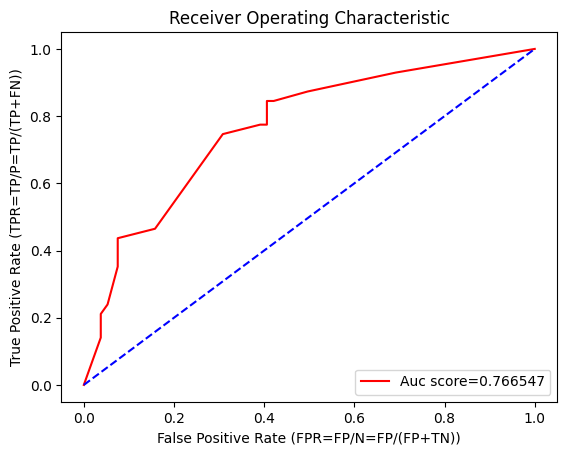

In [47]:
#ROC graph for Decision Tree
y_score=dtree.predict_proba(final_x_test)[:,1]
fpr2,tpr2,threshold2=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr2,tpr2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr2,tpr2,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')

From the Reciever Operating Characteristic(ROC) graph, we find the Area Under Curve(AUC) for our Decision Tree classifier model is 0.766547

AUC value of Decision Tree = 0.766547

In [48]:
#decision tree with outliers
dtree1 = DecisionTreeClassifier(min_samples_leaf=5,max_depth=5,random_state=100)
dtree1.fit(o_x_train,o_y_train)

acc_dtree1 = dtree1.score(o_x_test,o_y_test)
print("Accuracy of decision tree with outliers: ",acc_dtree1,"\n")

Accuracy of decision tree with outliers:  0.6623376623376623 



**Logistic Regression Model**

In [49]:
#importing required modules
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()

#logistic regression without outliers
logmodel.fit(final_x_train,final_y_train)
pred_log = logmodel.predict(final_x_test)
acc_lr = logmodel.score(final_x_test,final_y_test)
print("Accuracy of logistic regression is withour outliers: ",acc_lr,"\n")

Accuracy of logistic regression is withour outliers:  0.7794117647058824 



In [51]:
#Create confusion matrix
pd.DataFrame(confusion_matrix(final_y_test, pred_log),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]])

,Predicted Class 0,Predicted Class 1
Class 0,126,7
Class 1,38,33


Text(0.5, 0, 'False Positive Rate (FPR=FP/N=FP/(FP+TN))')

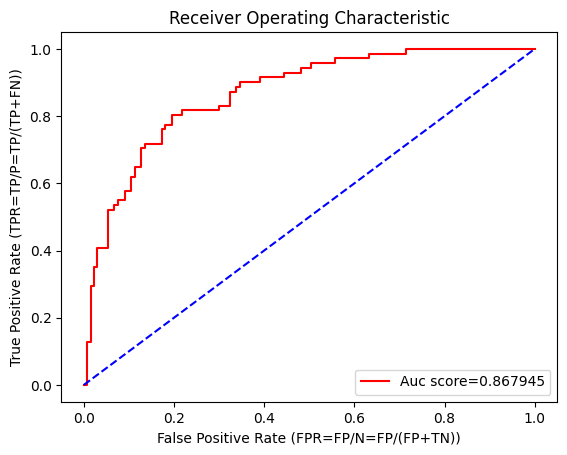

In [52]:
#ROC graph Logistic Regression
y_score=logmodel.predict_proba(final_x_test)[:,1]
fpr3,tpr3,threshold3=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr3,tpr3)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3,tpr3,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')

From the Reciever operating Characteristic(ROC) graph, we find the Area Under Curve(AUC) for our Logistic Regression classifier model is 0.867945

In [53]:
#printing the coefficients of logmodel
fcol = final_x_test.columns 

lm = np.asarray(logmodel.coef_).flatten()
for i in range(0, len(lm)):
  print(fcol[i],"=",lm[i])

glucose = 0.03671779767068327
bmi = 0.07746382582511345
pedigree = 1.1764318757470082
age = 0.024738275530206234


In [54]:
#R Square for logistic regression
from sklearn.metrics import mean_squared_error,r2_score

print('R2_Score:',r2_score(final_y_test,pred_log),"\n")

R2_Score: 0.027851318436937555 



In [55]:
#RMSE for logistic regression
mse=mean_squared_error(final_y_test,pred_log)
rmse=np.sqrt(mse)
print("mean_squared_error is %f and rmse is " %mse ,rmse)

mean_squared_error is 0.220588 and rmse is  0.46966821831386213


In [56]:
#logistic regression without outliers and with standardize
logmodel2=LogisticRegression()
logmodel2.fit(final_x_std_train,final_y_train)

acc_log2 = logmodel2.score(final_x_std_test,final_y_test)
print("Accuracy of logistic regression with standardize: ",acc_log2,"\n")

Accuracy of logistic regression with standardize:  0.7794117647058824 



Text(0.5, 0, 'False positive rate')

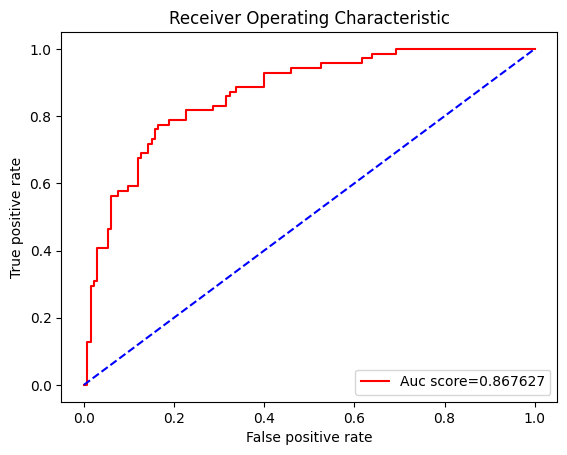

In [57]:
y_score=logmodel2.predict_proba(final_x_std_test)[:,1]
fpr3,tpr3,threshold3=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr3,tpr3)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3,tpr3,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


In [58]:
#logistic regression with outliers and without standardize
logmodel3=LogisticRegression()
logmodel3.fit(o_x_train,o_y_train)

acc_log3 = logmodel3.score(o_x_test,o_y_test)
print("Accuracy of logistic regression with outlier, without standardize: ",acc_log3,"\n")

Accuracy of logistic regression with outlier, without standardize:  0.7402597402597403 



**Comparing accuracy of all 4 models**

In [59]:
#printing the accuracy scores of all the 4 models:
print("KNN: ",acc_knn)
print("GNB: ",acc_nb)
print("LR: ",acc_lr)
print("DTree: ",acc_dt)

KNN:  0.7549019607843137
GNB:  0.7941176470588235
LR:  0.7794117647058824
DTree:  0.7549019607843137


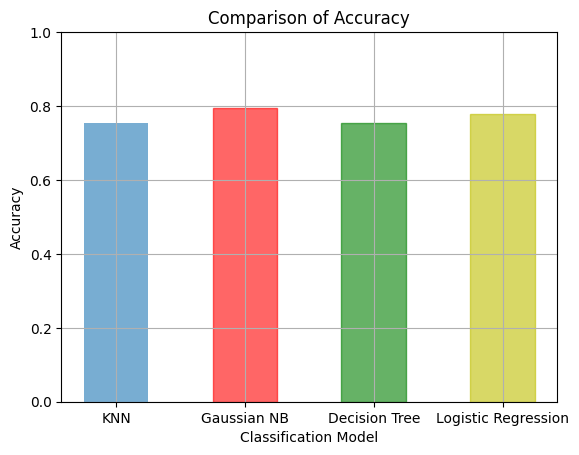

In [60]:
#comparing accuracies of 4 models using barplot
models = ["KNN", "Gaussian NB", "Decision Tree", "Logistic Regression"]
accuracies = [acc_knn, acc_nb, acc_dt, acc_lr]
barlist = plt.bar(models, accuracies, width=0.5, alpha=0.6)
plt.ylim(0,1.0)
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('y')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy')
plt.grid()

**Saving Gaussian Naive Bayes model using pickle**

In [61]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(nb, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

input_data = (166,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
